# Deconvnet Visualization

## import keras model

In [1]:
from keras.applications import vgg16, imagenet_utils

Using TensorFlow backend.


## import deconvnet submodule

In [2]:
from deconvnet import *

## read image path

In [3]:
from os import listdir
from os.path import isfile, join

img_dir = "../images/"

img_paths = [img_dir + f for f in listdir(img_dir) if isfile(join(img_dir, f))]

In [4]:
img_paths

['../images/cat.jpg',
 '../images/cat_dog.jpg',
 '../images/dorm.jpg',
 '../images/elephant.jpg',
 '../images/husky.jpg']

## load keras model

In [5]:
image_path = "../images/cat.jpg"
layer_name = "block5_conv3"
feature_to_visualize = 256
visualize_mode = "max"

model = vgg16.VGG16(weights='imagenet', include_top=True)

layer_dict = dict([(layer.name, layer) for layer in model.layers])
if layer_name not in layer_dict:
    print('Wrong layer name')
    sys.exit()

## build deconvnet and visualize layer

In [6]:
deconv = []
for img_path in img_paths:
    # Load data and preprocess
    img = Image.open(img_path)
    img = img.resize((224, 224), Image.BILINEAR)
    img_array = np.array(img)
    img_array = img_array[np.newaxis, :]
    img_array = img_array.astype(np.float)
    img_array = imagenet_utils.preprocess_input(img_array)
    
    deconv.append(visualize(model, img_array, layer_name, feature_to_visualize, visualize_mode))

## Plot

In [7]:
import cv2

import  matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

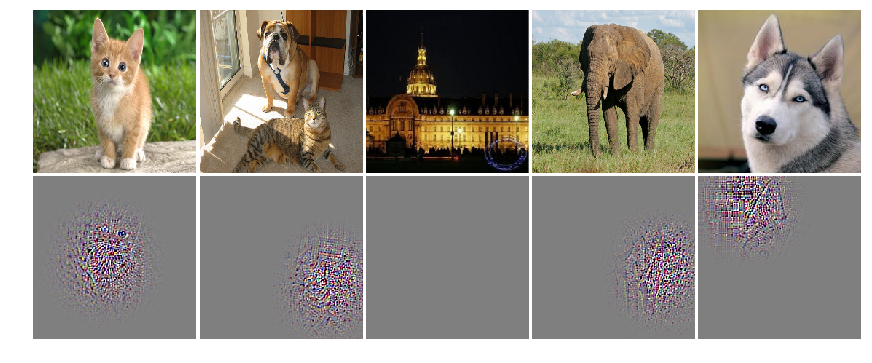

In [8]:
img_width  = 224
img_height = 224

plt.figure(figsize=(20, 10))
left  = 0.125  # the left side of the subplots of the figure
right = 0.7    # the right side of the subplots of the figure
bottom = 0.44   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.02   # the amount of width reserved for blank space between subplots
hspace = 0.0   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

for idx, feature in enumerate(deconv):
#     feature = cv2.resize(feature, (img_width, img_height))
    result = cv2.cvtColor(deprocess_image(feature), cv2.COLOR_RGB2BGR)
    
    img = cv2.imread(img_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))
    
    plt.subplot(2, 5, idx+1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(2, 5, 5 + idx+1)
    plt.imshow(result)
    plt.axis('off')